<a href="https://colab.research.google.com/github/LeehCost/enterprise-data-analysis/blob/main/dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pd.set_option('display.float_format', '{:.2f}'.format) #mostra os floats com 2 casas decimais, útil pelos numeroes extensos n sei se funcionou legal aqui poréeem é util depois

***Importação das Bibliotecas***

In [ ]:
!pip install pandas openpyxl #instala o pandas(usado para manipular os dados) e o open (leitura e escrita de arquivos excel .xlsx) no colabis da silva
import pandas as pd # obs: o '!' comando do sistema, nao do python e essa linha importa a biblioetca e dá o apelido pd para usar funções. ex: pd.read
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import duckdb
import spacy # Added missing import for spacy


In [ ]:
from google.colab import drive #importando do google drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
from google.colab import files #files.upload abre a janela para a escolha do arquivo
arquivo = files.upload()

Saving HORAS PRODUZIDAS 2023.1 (3).xlsx to HORAS PRODUZIDAS 2023.1 (3) (1).xlsx
Saving HORAS PRODUZIDAS 2024.1 (3).xlsx to HORAS PRODUZIDAS 2024.1 (3) (1).xlsx
Saving HORAS PRODUZIDAS 2025.1 1 (1) (1).xlsx to HORAS PRODUZIDAS 2025.1 1 (1) (1) (1).xlsx


In [ ]:
df_teste = pd.read_excel('HORAS PRODUZIDAS 2023.1 (3).xlsx', skiprows=2)
df_teste.columns

Index([' CONDOMINIO CITY TOWER G1 ',                     'LUCAS ',
                                  6,                            1,
                         '6-1-2023',                          101,
                 1.6833333333333333,                 'Unnamed: 7'],
      dtype='object')

In [ ]:
df1 = pd.read_excel('HORAS PRODUZIDAS 2024.1 (3).xlsx') #importa planilha dos anos
df1['ANO'] = 2024 # Add year column for df1
df2 = pd.read_excel('HORAS PRODUZIDAS 2025.1 1 (1) (1).xlsx')
df2['ANO'] = 2025 # Add year column for df2
df3 = pd.read_excel('HORAS PRODUZIDAS 2023.1 (3).xlsx')
df3['ANO'] = 2023 # Add year column for df3

In [ ]:
duckdb.register("t1", df1) #coloquei o dataframe dentro do duckdb e chama ele de t1 / duckdb = banco de dados que funciona dentro do python apenas memória
duckdb.register("t2",df2)
duckdb.register("t3", df3)

**Criação do Id, importação pro SQL**

In [ ]:
df = pd.read_excel('HORAS PRODUZIDAS 2024.1 (3).xlsx') #coloquei apenas para ler a planilha, pois estava dando uns erros de conversão
df.columns



df.head()

,CLIENTE,TECNICO,DIA,MES,DATA,TEMPO_EXECUCAO,HORAS_TRABALHADAS,SERVICO_EXTRA
0,COND. VISCONDE DE INHAUMA,RYAN,6.00,1.00,NaN,99.00,1.65,NaN
1,COND. VISCONDE DE INHAUMA,RYAN,6.00,1.00,NaN,50.00,0.83,NaN
2,MUSEU MAR,RYAN,8.00,1.00,NaN,202.00,3.37,NaN
3,MUSEU MAR,RYAN,9.00,1.00,NaN,56.00,0.93,SUBSTITUIÇÃO DO CARREGADOR DE BATERIA
4,COCA COLA NOVO MUNDO,THIAGO,8.00,1.00,8-1-2024,70.00,1.17,REVISAO ANUAL


In [ ]:
df1.columns, df2.columns, df3.columns # checando as colunas, pois tinham linhas vazias

(Index(['CLIENTE', 'TECNICO', 'DIA', 'MES', 'DATA', 'TEMPO_EXECUCAO',
        'HORAS_TRABALHADAS', 'SERVICO_EXTRA', 'ANO'],
       dtype='object'),
 Index(['CLIENTE', 'TECNICO', 'DIA', 'MES', 'DATA', 'TEMPO_EXECUCAO',
        'HORAS_TRABALHADAS', 'SERVICO_EXTRA', 'ANO'],
       dtype='object'),
 Index(['CLIENTE', 'TECNICO', 'DIA', 'MES', 'DATA', 'TEMPO_EXECUCAO',
        'HORAS_TRABALHADAS', 'SERVICO_EXTRA', 'ANO'],
       dtype='object'))

In [ ]:
consulta = """
SELECT
row_number() OVER () AS id,    --cria um numero de linhas como id
* FROM(
  SELECT *, 2024 as ANO FROM t1 -- pega todos os dados da plailha t1 e adiciona coluna ANO =  2024
  UNION ALL -- junta os dados sem remover repetidos(empilha)
  SELECT *, 2025 as ANO FROM t2
  UNION ALL
  SELECT *, 2023 as ANO FROM t3
)
"""

df_final = duckdb.sql(consulta).df()  #roda o sql no duckdb e transforma em dataframe/tabelaexcel

df_final

,id,CLIENTE,TECNICO,DIA,MES,DATA,TEMPO_EXECUCAO,HORAS_TRABALHADAS,SERVICO_EXTRA,ANO,ANO_1
0,1,COND. VISCONDE DE INHAUMA,RYAN,6.00,1.00,None,99.00,1.65,None,2024,2024
1,2,COND. VISCONDE DE INHAUMA,RYAN,6.00,1.00,None,50.00,0.83,None,2024,2024
2,3,MUSEU MAR,RYAN,8.00,1.00,None,202.00,3.37,None,2024,2024
3,4,MUSEU MAR,RYAN,9.00,1.00,None,56.00,0.93,SUBSTITUIÇÃO DO CARREGADOR DE BATERIA,2024,2024
4,5,COCA COLA NOVO MUNDO,THIAGO,8.00,1.00,8-1-2024,70.00,1.17,REVISAO ANUAL,2024,2024
...,...,...,...,...,...,...,...,...,...,...,...
9094,9095,SHOPPING VALE SUL G2,RYAN,30.00,3.00,30-3-2023,173.00,2.88,None,2023,2023
9095,9096,SHOPPING VALE SUL G3,RYAN,30.00,3.00,30-3-2023,145.00,2.42,None,2023,2023
9096,9097,SHOPPING VALE SUL MOTOBOMBA,RYAN,30.00,3.00,30-3-2023,63.00,1.05,None,2023,2023
9097,9098,NUTRIENTES,RYAN,23.00,10.00,23-10-2023,32.00,0.53,None,2023,2023


In [ ]:
df_final.head() # aqui seria só para mostrar as 10 primeiras linhas e as informações da planilha
df_final.info()
df_final.groupby('id').sum() #pega as linhas com o mesmo id e soma os numeros para nao ficar repetitivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9099 entries, 0 to 9098
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9099 non-null   int64  
 1   CLIENTE            9094 non-null   object 
 2   TECNICO            8922 non-null   object 
 3   DIA                8918 non-null   float64
 4   MES                8943 non-null   float64
 5   DATA               3677 non-null   object 
 6   TEMPO_EXECUCAO     8898 non-null   float64
 7   HORAS_TRABALHADAS  8595 non-null   float64
 8   SERVICO_EXTRA      1485 non-null   object 
 9   ANO                9099 non-null   int64  
 10  ANO_1              9099 non-null   int32  
dtypes: float64(4), int32(1), int64(2), object(4)
memory usage: 746.5+ KB


,CLIENTE,TECNICO,DIA,MES,DATA,TEMPO_EXECUCAO,HORAS_TRABALHADAS,SERVICO_EXTRA,ANO,ANO_1
id,,,,,,,,,,
1,COND. VISCONDE DE INHAUMA,RYAN,6.00,1.00,0,99.00,1.65,0,2024,2024
2,COND. VISCONDE DE INHAUMA,RYAN,6.00,1.00,0,50.00,0.83,0,2024,2024
3,MUSEU MAR,RYAN,8.00,1.00,0,202.00,3.37,0,2024,2024
4,MUSEU MAR,RYAN,9.00,1.00,0,56.00,0.93,SUBSTITUIÇÃO DO CARREGADOR DE BATERIA,2024,2024
5,COCA COLA NOVO MUNDO,THIAGO,8.00,1.00,8-1-2024,70.00,1.17,REVISAO ANUAL,2024,2024
...,...,...,...,...,...,...,...,...,...,...
9095,SHOPPING VALE SUL G2,RYAN,30.00,3.00,30-3-2023,173.00,2.88,0,2023,2023
9096,SHOPPING VALE SUL G3,RYAN,30.00,3.00,30-3-2023,145.00,2.42,0,2023,2023
9097,SHOPPING VALE SUL MOTOBOMBA,RYAN,30.00,3.00,30-3-2023,63.00,1.05,0,2023,2023


**Reparo de erros de formatação que continham na planilha**

In [ ]:
df = df.dropna(subset=["CLIENTE", "TECNICO" ], how = "any") #remove as linhas do dataframe onde cliente e tecnico estao vazias / se cliente nan e tecnico nan remove

In [ ]:
df_final['TECNICO'] = (df_final['TECNICO'].astype(str).str.strip().str.lower()) # astype(str) - garante que tudo é texto, .str.strip() tira espaço antes/dps , str.lower() - deixa tudo minusculo
# transforma string "nan" em valor ausente de verdade, e o vazio vira nan tambem/none, tinha um erro nos nomes um como virgula
df_final['TECNICO'] = df_final['TECNICO'].replace({
    'nan': np.nan,
    'none': np.nan,
    '': np.nan,
    ',': np.nan})
df_final['TECNICO'] = df_final['TECNICO'].replace({ # aqui criei pra substituir os nomes dos tecnicos que estavam com erros ortograficps, nisso ele substitui para o nome correto alguns erros observados
'ryam' : 'ryan',
'jeferson' : 'jefferson',
'thjiago' : 'thiago',
'albertro' : 'alberto',
'buenos': 'bira',
})
df_final = df_final[df_final['TECNICO']!= ','] #pra garantir que a linha com virgula nao aparece
df_final['TECNICO'] = df_final['TECNICO'].str.title() #coloca a primeira letra maiusculaa

In [ ]:
df_final['TECNICO'].unique()


array(['Ryan', 'Thiago', 'Marcio', 'Eduardo', 'Alex', 'Leandro', 'Lucas',
       'Alberto', 'Jefferson', 'Igor', nan, 'Bira'], dtype=object)

In [ ]:
df_final["TECNICO"].value_counts() # verificar se deu certo


,count
TECNICO,
Eduardo,1538
Ryan,1419
Leandro,1325
Igor,1271
Marcio,1171
Thiago,893
Lucas,557
Alberto,426
Jefferson,245


In [ ]:
df.shape

(3506, 8)

In [ ]:
df.columns
df.head()


,CLIENTE,TECNICO,DIA,MES,DATA,TEMPO_EXECUCAO,HORAS_TRABALHADAS,SERVICO_EXTRA
0,COND. VISCONDE DE INHAUMA,RYAN,6.00,1.00,NaN,99.00,1.65,NaN
1,COND. VISCONDE DE INHAUMA,RYAN,6.00,1.00,NaN,50.00,0.83,NaN
2,MUSEU MAR,RYAN,8.00,1.00,NaN,202.00,3.37,NaN
3,MUSEU MAR,RYAN,9.00,1.00,NaN,56.00,0.93,SUBSTITUIÇÃO DO CARREGADOR DE BATERIA
4,COCA COLA NOVO MUNDO,THIAGO,8.00,1.00,8-1-2024,70.00,1.17,REVISAO ANUAL


In [ ]:
df.tail() #tinham alguns dados no final do dataframe totalmente vazios, usei isso para verificar com estava  o final

,CLIENTE,TECNICO,DIA,MES,DATA,TEMPO_EXECUCAO,HORAS_TRABALHADAS,SERVICO_EXTRA
3609,COCA COLA JUIZ DE FORA,RYAN,26.00,12.00,NaN,130.00,2.17,NaN
3610,COCA COLA BETIM,LEANDRO,9.00,12.00,NaN,68.00,1.13,NaN
3611,COCA COLA BETIM,LEANDRO,9.00,12.00,NaN,26.00,0.43,NaN
3612,COCA COLA BETIM,LEANDRO,9.00,12.00,NaN,279.00,4.65,DESACOPLAMENTO DO ALTERNADOR
3613,COCA COLA DIVINOPOLIS,EDUARDO,18.00,12.00,NaN,98.00,1.63,NaN


In [ ]:
df["DIA"] =  df["DIA"].astype("Int64") #convertendo para int, estava dando erro
df["MES"] =  df["MES"].astype("Int64")

**Exibição das Horas trabalhadas por cada técnico no período analisado**



In [ ]:
df_final.groupby("TECNICO")["HORAS_TRABALHADAS"].sum().sort_values(ascending=False) #somatório das horas trabalhadas por cada tecnico
#ascending false - ordena do maior para o menor ordem descrescente
#ascending true ordem crescente


,HORAS_TRABALHADAS
TECNICO,
Eduardo,2021.48
Leandro,1923.63
Ryan,1762.92
Igor,1341.42
Marcio,1274.33
Thiago,1101.67
Lucas,1030.40
Alberto,337.00
Jefferson,286.72


In [ ]:
df.tail()

,CLIENTE,TECNICO,DIA,MES,DATA,TEMPO_EXECUCAO,HORAS_TRABALHADAS,SERVICO_EXTRA
3609,COCA COLA JUIZ DE FORA,RYAN,26,12,NaN,130.00,2.17,NaN
3610,COCA COLA BETIM,LEANDRO,9,12,NaN,68.00,1.13,NaN
3611,COCA COLA BETIM,LEANDRO,9,12,NaN,26.00,0.43,NaN
3612,COCA COLA BETIM,LEANDRO,9,12,NaN,279.00,4.65,DESACOPLAMENTO DO ALTERNADOR
3613,COCA COLA DIVINOPOLIS,EDUARDO,18,12,NaN,98.00,1.63,NaN


**Somatório das horas trabalhadas por técnico no total**




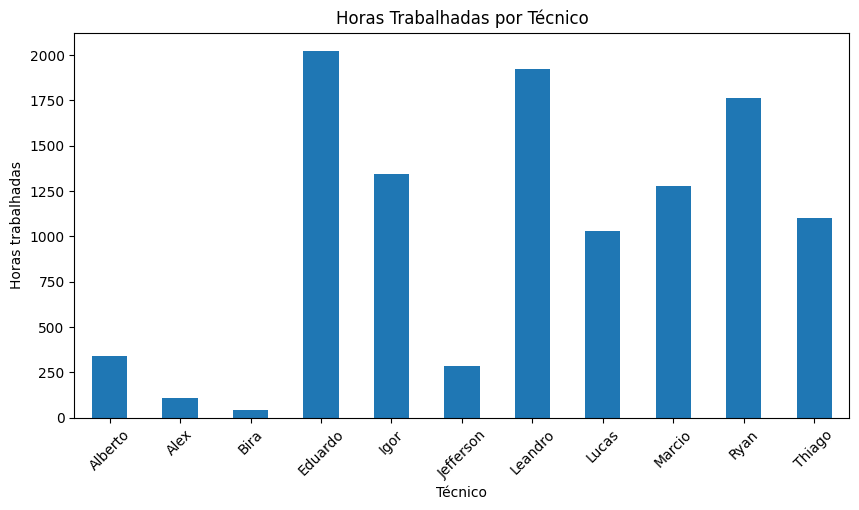

In [ ]:
h_tec = df_final.groupby('TECNICO') ['HORAS_TRABALHADAS'].sum() #soma/agrupa pelo nome do tec e soma todas as horas trabalhadas dele
plt.figure(figsize=(10,5)) #tamanho do grafico, isso é insuportavel de saber mas esse é largo e baixo
h_tec.plot(kind = 'bar') #desenha o grafico de barras
plt.title('Horas Trabalhadas por Técnico') #titulo
plt.xlabel('Técnico') #nomeia eixo x
plt.ylabel('Horas trabalhadas') #nomeia eixo y
plt.xticks(rotation=45) #gira o nome dos tecnicos em 45 graus, pra n ficarem mto em cima um do outro
plt.show() #grafico das horas trabalhasas pelos tecnicos

**Dashboard das horas trabalhadas dos técnicos em cada ano**

observações:
1.   Eduardo, Leandro e Ryan aparecem com maior participação de horas, indicando maior partipação/demanda sobre eles.
2.   Alberto, Jefferson, Alex e Bira possuem bem menos horas registradas por terem entrado posteriormente na equipe e por possuírem funções mais especifícas




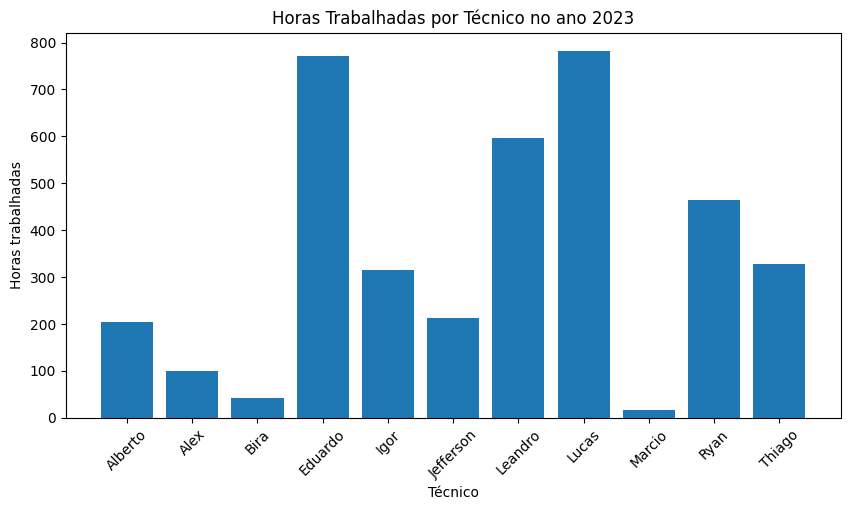

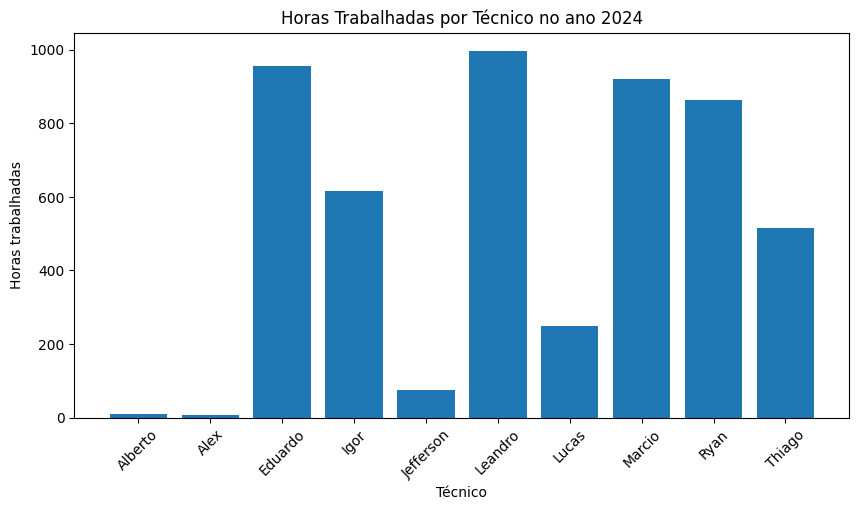

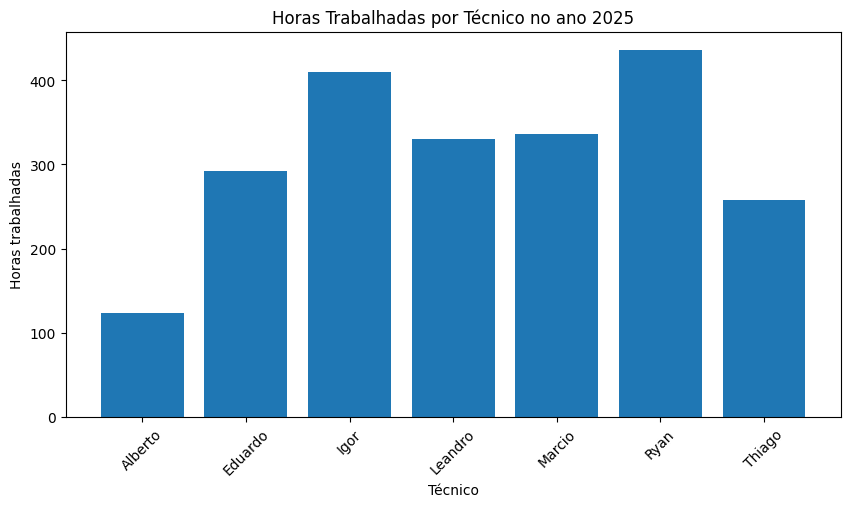

In [ ]:
h_ano_tec = df_final.groupby(['ANO','TECNICO']) ['HORAS_TRABALHADAS'].sum().reset_index() #soma/agrupa pelo nome do tec e soma todas as horas trabalhadas dele
anos  = sorted(h_ano_tec['ANO'].unique())

for ano in anos:
  dados_ano = h_ano_tec[h_ano_tec['ANO'] == ano]
  plt.figure(figsize=(10,5)) #tamanho do grafico, isso é insuportavel de saber mas esse é largo e baixo
  plt.bar(dados_ano['TECNICO'], dados_ano['HORAS_TRABALHADAS'])
  plt.title(f'Horas Trabalhadas por Técnico no ano {ano}') #titulo
  plt.xlabel('Técnico') #nomeia eixo x
  plt.ylabel('Horas trabalhadas') #nomeia eixo y
  plt.xticks(rotation=45) #gira o nome dos tecnicos em 45 graus, pra n ficarem mto em cima um do outro
  plt.show() #grafico das horas trabalhasas pelos tecnicos

In [ ]:
df.columns #importante verificar as colunas, ainda mais se conter erros

Index(['CLIENTE', 'TECNICO', 'DIA', 'MES', 'DATA', 'TEMPO_EXECUCAO',
       'HORAS_TRABALHADAS', 'SERVICO_EXTRA'],
      dtype='object')

In [ ]:
df.shape

(3506, 8)

In [ ]:
df.columns #verificando se concatenou novamente

Index(['CLIENTE', 'TECNICO', 'DIA', 'MES', 'DATA', 'TEMPO_EXECUCAO',
       'HORAS_TRABALHADAS', 'SERVICO_EXTRA'],
      dtype='object')

In [ ]:
print(df)

                        CLIENTE  TECNICO  DIA  MES      DATA  TEMPO_EXECUCAO  \
0     COND. VISCONDE DE INHAUMA     RYAN    6    1       NaN           99.00   
1     COND. VISCONDE DE INHAUMA     RYAN    6    1       NaN           50.00   
2                     MUSEU MAR     RYAN    8    1       NaN          202.00   
3                     MUSEU MAR     RYAN    9    1       NaN           56.00   
4          COCA COLA NOVO MUNDO   THIAGO    8    1  8-1-2024           70.00   
...                         ...      ...  ...  ...       ...             ...   
3609     COCA COLA JUIZ DE FORA     RYAN   26   12       NaN          130.00   
3610            COCA COLA BETIM  LEANDRO    9   12       NaN           68.00   
3611            COCA COLA BETIM  LEANDRO    9   12       NaN           26.00   
3612            COCA COLA BETIM  LEANDRO    9   12       NaN          279.00   
3613      COCA COLA DIVINOPOLIS  EDUARDO   18   12       NaN           98.00   

      HORAS_TRABALHADAS                

**Criação da nova coluna data, a anterior estava dando problema na análise**

In [ ]:
if "DATA" in df.columns: #verifica se ja existe uma cokuna chamada data / problema nas datas
  del df["DATA"] # se existir, apaga pra poder criar uma do zero
  df["DATA"] = pd.to_datetime( #transforma esse texto em uma data verdadeira do pandas (pd.to_datetime)
    df["DIA"].fillna(0).astype(int).astype(str) + "-" + #se o dia estiver vazio coloca 0(fillna(0)), converte o dia para inteiro e depois vira texto
    df["MES"].fillna(0).astype(int).astype(str) + "-2024", #faz a mesma coisa no mes
    dayfirst=True, #diz que o padrao é o dia primeiro, nao mes
    errors="coerce" #se a data for invalida, coloca NAT e nao trava
)




**Resumo Estatistico**
*   3505 linhas completas na base.
*   Média das horas trabalhadas por serviço é 1,49h.
* Tempo médio de execução é 89,45 minutos.
* Metade dos serviços duram até 65 minutos.
* Desvio padrão alto indicando bastante variação entre serviços curtos e longos.

In [ ]:
df.describe() #resumo estatistico automatico

,DIA,MES,TEMPO_EXECUCAO,HORAS_TRABALHADAS,DATA
count,3505.00,3505.00,3495.00,3506.00,3505
mean,14.78,6.42,89.45,1.49,2024-06-27 18:42:25.164051456
min,1.00,1.00,2.00,0.00,2024-01-01 00:00:00
25%,8.00,3.00,54.00,0.90,2024-03-27 00:00:00
50%,15.00,6.00,65.00,1.08,2024-06-25 00:00:00
75%,21.00,9.00,82.00,1.37,2024-09-26 00:00:00
max,31.00,12.00,7550.00,125.83,2024-12-30 00:00:00
std,8.22,3.47,201.55,3.35,NaN


**Frequencia de Chamadas por Mês**
* Janeiro é o mês com maior número de atendimentos
* Junho é o que contém menor quantidade

In [ ]:
df["MES"].value_counts() #conta quantas vezes cada mes aparece, util para ver a media de serviços mensais nesses 3 anos

,count
MES,
1,328
9,300
5,296
7,296
2,293
3,290
8,290
11,286
4,284


* Os serviços duram normalmente entre 1h e 1h30, o que reforça que a maioria das tarefas é de curta duração

In [ ]:
soma_df = df["HORAS_TRABALHADAS"].sum() #media min e max das horas
media_df = round(df["HORAS_TRABALHADAS"].mean(),2)
mediana_df = df["HORAS_TRABALHADAS"].median()
print("Soma:", soma_df, "\nMédia", media_df, "\nMediana", mediana_df)

Soma: 5210.4 
Média 1.49 
Mediana 1.0833333333333333


In [ ]:
df['HORAS_TRABALHADAS'].dtype #verificando o tipo que estava esses dados da coluna, pois o programa estava com dificuldades em converter por uma linha em especifico


dtype('float64')

**Classficação das categorias**

In [ ]:
# e cria um dataframe chamado df(dataframe é como se fosse uma tabela do excel
# dentro do python, c linhas e colunas)


coluna_desc = 'SERVICO_EXTRA' #armazena o nome da coluna que contém as palavras
#obs: facilita se precisar alterar o nome

palavra_limpeza = ['limpez'] #trechos de palavras que indica o tipo de serviço
palavra_troca = ['substi','troca']
palavra_revisao = ['revisa']
palavra_desmontagem = ['desmont']
palavra_dialise = ['dialis']
palavra_instalacao = ['instal']
palavra_preventiva = ['prevent']
palavra_corretiva = ['corret']
palavra_inoperante = ['inoper']
palavra_reparo = ['reparo']
palavra_carregador = ['carreg']
palavra_acoplamento = ['acopl']
palavra_montagem = ['mont'] #comecei aqui os news
palavra_regulagem = ['regula']
palavra_retirada = ['retira', 'remo']
palavra_raspagem = ['raspa']
palavra_teste = ['test']
palavra_corretiva = ['corret']
palavra_emergencial = ['emerge']
palavra_revisaoanual = ['anual']
palavra_nmanutencao = ['não fez'] #sepa tira esse
palavra_drenagem = ['drena']
palavra_carregador = ['carrega']
palavra_desligamento = ['desliga']

if 'categoria_servico' not in df.columns: # verifica se a coluna categoria já existe
  df_final ['categoria_servico'] = '' # se nao existir. cria a coluna vazia para o armazenamento

def classificar(frase): # CUIDADO P NAO DEIXAR DENTRO DA CONDIÇÃO!
# / DEFINE A FUNCAO QUE VAI ANALISAR
    frase = str(frase).lower() #garante que seja texto e transforma tudo em piquetuxo, pra facilitar
    categorias = [] #cria uma  lista vazia pra guardar as categorias encontradas

    if any(p in frase for p in palavra_limpeza): #autexplicativo, guarda nas respectivas categorias
      categorias.append('limpeza')
    if any(p in frase for p in palavra_troca):
      categorias.append('troca de peça')
    if any(p in frase for p in palavra_revisao):
      categorias.append('revisão')
    if any(p in frase for p in palavra_desmontagem):
      categorias.append('desmontagem')
    if any(p in frase for p in palavra_dialise):
      categorias.append('diálise')
    if any(p in frase for p in palavra_instalacao):
      categorias.append('instalação')
    if any(p in frase for p in palavra_preventiva):
      categorias.append('manutenção preventiva')
    if any(p in frase for p in palavra_corretiva):
      categorias.append('manutenção corretiva')
    if any(p in frase for p in palavra_inoperante):
      categorias.append('inoperante')
    if any(p in frase for p in palavra_reparo):
      categorias.append('reparo')
    if any(p in frase for p in palavra_carregador):
      categorias.append('carregador de bateria')
    if any(p in frase for p in palavra_acoplamento):
      categorias.append('acoplamento')
    if any(p in frase for p in palavra_montagem):
      categorias.append('montagem')
    if any(p in frase for p in palavra_regulagem):
      categorias.append('regulagem')
    if any(p in frase for p in palavra_retirada):
      categorias.append('retirada de peça')
    if any(p in frase for p in palavra_raspagem):
      categorias.append('raspagem')
    if any(p in frase for p in palavra_teste):
      categorias.append('teste')
    if any(p in frase for p in palavra_emergencial):
      categorias.append('atendimento emergencial')
    if any(p in frase for p in palavra_revisaoanual):
      categorias.append('revisão anual')
    if any(p in frase for p in palavra_nmanutencao):
      categorias.append('Não fez a manutenção mensal')
    if any(p in frase for p in palavra_drenagem):
      categorias.append('drenagem')
    if any(p in frase for p in palavra_desligamento):
      categorias.append('desligamento')


    if not categorias: #SE nenhuma palavra for encontrada, celula vazia, classifica como padrao a mensal ai
      categorias.append('manutenção mensal')

    return categorias[0] # deixa só um por linbha, no inicio utilizei o join mas vi que atrapalhou na analise dos graficos e ficou melhor separar individualmente


df_final.loc[:, 'categoria_servico'] = '' #limpa a coluna categoria_servico no df_final
df_final.loc[:, 'categoria_servico'] = df_final[coluna_desc].apply(classificar) #substitui a coluna categoria_servico no df_final / pra cada linha pega uma do servico extra e aplica a funcao e deppis vira a categoria

#df_final['categoria_servico'] = df_final[coluna_desc].apply(classificar) #aplica a func classificar linha por linha
#df_final[['SERVICO_EXTRA', 'categoria_servico']].head(20) # o apply faz com que armazene na nova categoria
#essa ultima linha mostra apenas as colunas importantes das 20 priemiras linhas (conferir se worked)

**Divisão das peças em uma nova subcategoria**

In [ ]:
pecas = [ #dividindo as peças em subcategorias da troca de peças
    'regulador',
     'oleo lubrificante',
     'tampa de valvulas',
     'liquido de arrefecimento',
     'filtros do motor',
     'bateria',
     'filtro de ar',
     'filtro de combustível',
     'filtro lubrificante',
     'filtro de agua',
     'troca resistencia',
     'mangueira',
     'controlador',
     'correias',
     'valvula termostatica',
     'solenoide',
     'bomba injetora',
     'display',
     'radiador'

]
df_final = df_final.reset_index(drop=True) #resete do indice, deixa o indice limpo do data
df_final['subcategoria_peca'] = '' # Initialize the column with empty strings
df_final['subcategoria_peca'] = (
    df_final['subcategoria_peca']
    .astype(str)
    .str.strip()
    .str.lower()
)

for i in  range (len(df_final)): #loop em todas as linhas
  if df_final.loc[i, 'categoria_servico'] == 'troca de peça': #verifica se é troca de peça
     encontrado = False
     for p in pecas: #transforma tudo em minusculo e checa se a palavra ta na lista criada de peças e se achou coloca na
        if p.lower() in str(df_final.loc[i,'SERVICO_EXTRA']).lower(): #transforma tudo em minusculo para comparar, verifica se alguma das palavras esta na desc ricao do servico, se achar - atribui a peça a subcategoria e para o loop pq ja encontrou
          df_final.loc[i,'subcategoria_peca'] = p
          encontrado = True
          break
     if not encontrado: # se nao encontra coloca em outros
        df_final.loc[i,'subcategoria_peca'] = 'Outros'
df_final [['SERVICO_EXTRA', 'categoria_servico', 'subcategoria_peca']].head(20)

,SERVICO_EXTRA,categoria_servico,subcategoria_peca
0,None,manutenção mensal,
1,None,manutenção mensal,
2,None,manutenção mensal,
3,SUBSTITUIÇÃO DO CARREGADOR DE BATERIA,troca de peça,bateria
4,REVISAO ANUAL,revisão,
5,None,manutenção mensal,
6,None,manutenção mensal,
7,None,manutenção mensal,
8,None,manutenção mensal,
9,None,manutenção mensal,


As peças com maior ocorrência foram(para uma noção do impacto financeiro, adicionamos o preço médio):
1. Bateria (R$ 180 a 350)

2.  Mangueira (R$ 20 a 60)

3. Filtro de ar(R$ 25 a 70)

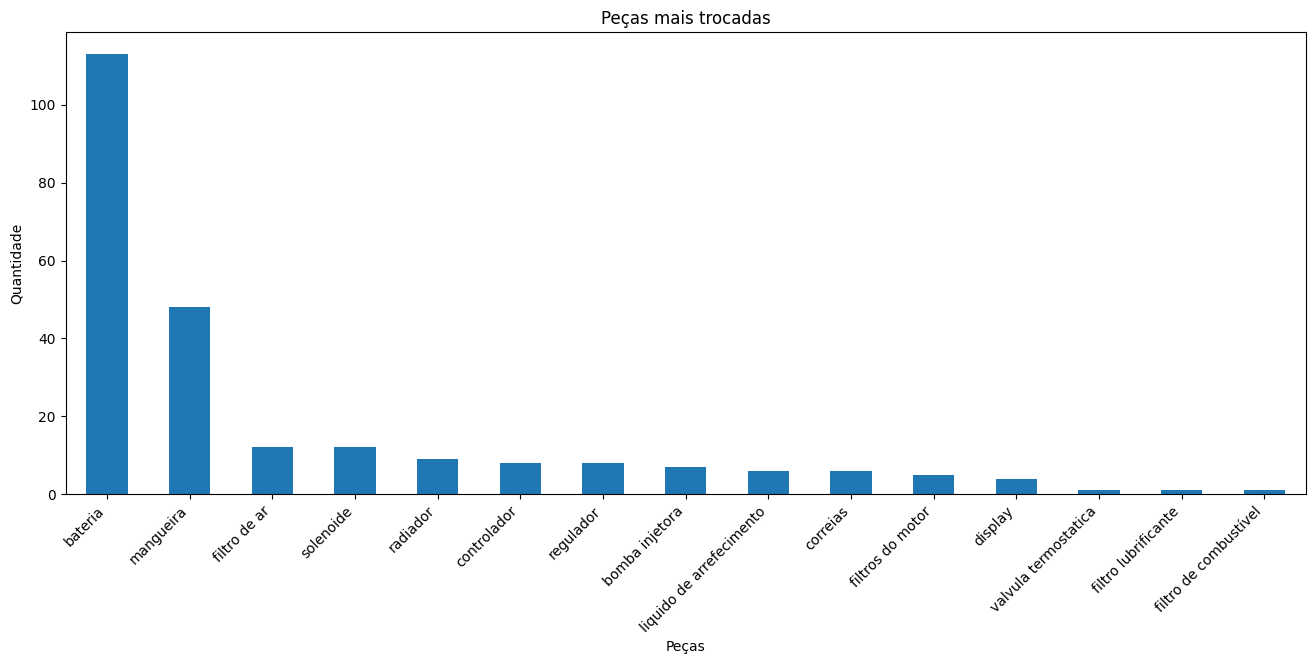

In [ ]:
contagem_pecas = df_final[df_final['categoria_servico'] == 'troca de peça']['subcategoria_peca'].value_counts() #seleciona só as linhas onde o serviço é troca de peça, pega apenas a coluna subcategoria e faz uma contagem das pelas mais trocadas
if "Outros" in contagem_pecas.index:
  contagem_pecas = contagem_pecas.drop("Outros")

plt.figure(figsize=(16,6))
contagem_pecas.plot(kind='bar')

plt.title('Peças mais trocadas')
plt.xlabel('Peças')
plt.ylabel('Quantidade')

plt.xticks(rotation=45, ha='right')
plt.show() #verificar se possui mais peças e retirar outros do grafico


**\\Variação das horas trabalhadas por meses**


---



* Janeiro e novembro - maior demanda
* Fevereiro e Março - menor carga de trabalho

In [ ]:
resultado_mes = df.groupby('MES')["HORAS_TRABALHADAS"].sum().reset_index()
resultado_mes = resultado_mes.sort_values(by="HORAS_TRABALHADAS", ascending= False)
print(resultado_mes) #total de horas por mes / separar por ano

    MES  HORAS_TRABALHADAS
0     1             639.60
10   11             521.30
5     6             461.67
8     9             454.30
9    10             437.17
11   12             436.50
6     7             410.78
3     4             378.02
4     5             377.48
7     8             373.40
2     3             364.68
1     2             355.50


In [ ]:
percentual = (
    df['SERVICO_EXTRA'] #pega a coluna servico extra, conta quantas vezes cada tipo aparece (value_counts), mas em porcentagem porqque normalize - true
    .value_counts(normalize=True) * 100 #transforma em percentual, retorna a fração de cada item no total (normalize=true)
).reset_index() #transforma o resultado em uma tabelaa normal

percentual.columns = ['SERVICO_EXTRA' , 'percentual']

print(percentual)

                                SERVICO_EXTRA  percentual
0                               REVISAO ANUAL       11.30
1           REVISAO ANUAL E LIMPEZA DE TANQUE        3.16
2                     ATENDIMENTO EMERGENCIAL        2.99
3                           LIMPEZA DE TANQUE        2.49
4                                  INOPERANTE        1.99
..                                        ...         ...
376          SUBSITUIDO FILTRO DE COMBUSTIVEL        0.17
377                   REALIZADA REVISAO ANUAL        0.17
378  REALIZADA  A FIXAÇÃO DA LONA DO RADIADOR        0.17
379           SUBSTITUIÇÃO DE INTERTRAVAMENTO        0.17
380       SUBSTITUIÇÃO DA BOBINA DA CONTATORA        0.17

[381 rows x 2 columns]


**Distribuição dos Tipos de Serviços Realizados**

In [ ]:

duckdb.register('df_final', df_final) #diz que a tabela pode ser usada no SQL


consulta_categoria = """ --cria a consulta categoria
SELECT
   categoria_servico,SUM(HORAS_TRABALHADAS) AS total ---pega cada cateogria de serviço
FROM df_final
GROUP BY categoria_servico --agrupa por categoria
ORDER BY total DESC --ordena do maior para o menor
"""

resultado_categoria = duckdb.sql(consulta_categoria).df() #roda a consulta

total_geral = resultado_categoria['total'].sum() #soma todas as horas de todas as categorias
resultado_categoria['percentual']= round((resultado_categoria['total']/ total_geral)* 100,1) #divide as horas dela pelo total geral, multiplica por 100(vira porcentagem), arredonda para 1 casa decimal
print(resultado_categoria)

          categoria_servico   total  percentual
0         manutenção mensal 8814.92       78.30
1             troca de peça  842.88        7.50
2                   limpeza  582.18        5.20
3                   revisão  362.28        3.20
4                instalação  148.72        1.30
5   atendimento emergencial   93.42        0.80
6      manutenção corretiva   81.08        0.70
7          retirada de peça   67.42        0.60
8               desmontagem   61.42        0.50
9                inoperante   50.02        0.40
10                    teste   46.08        0.40
11                 montagem   21.32        0.20
12                   reparo   18.35        0.20
13                regulagem   15.78        0.10
14             desligamento   13.27        0.10
15            revisão anual   10.78        0.10
16    carregador de bateria   10.65        0.10
17                 drenagem    7.03        0.10
18              acoplamento    4.65        0.00
19                  diálise     NaN     

Gráfico exibindo a quantidade de serviços por categoria
---

* Troca de peça é o serviço mais exigido, o que é comum na rotina de manutenção dos geradores.
* Categorias menos frequentes como atendimento emergencial e manutenção corretiva demonstra que falhas inesperadas são minoria.





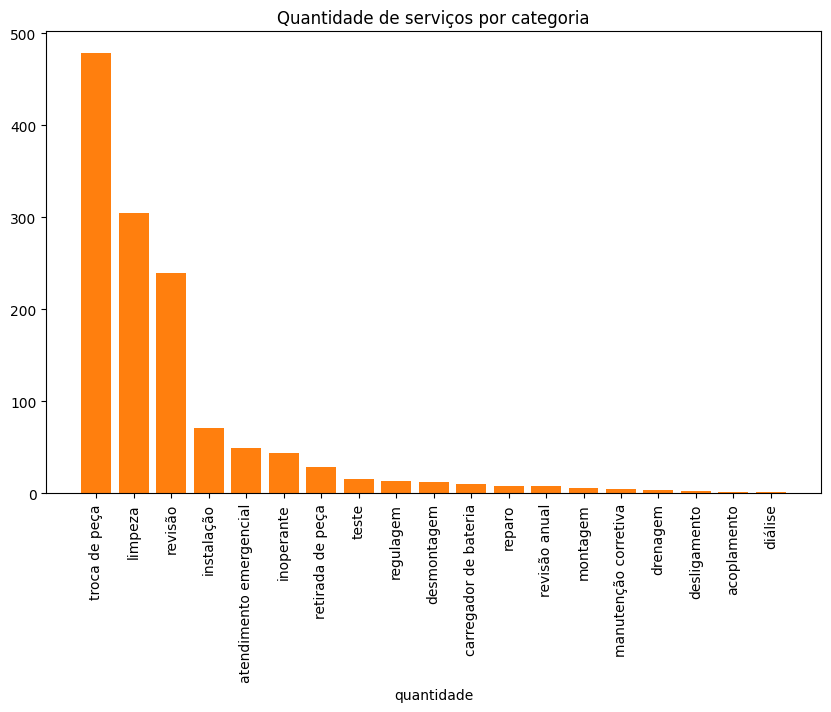

In [ ]:
contagem = {} # cria uma caixa vazia para armazenar quantas vezes cada categoria aaperece

for categoria in df_final['categoria_servico']:
  categoria = categoria.strip() #remove os espaços em branco
  if categoria !='manutenção mensal': #remove a mensal
   if categoria in contagem: #se tiver mais de uma adiciona na contagem
    contagem[categoria] +=1
   else:
    contagem[categoria] = 1 #se nao, cria como 1
tabela = pd.DataFrame({'categoria': list(contagem.keys()), #cria uma tabela com as categorias e quantidades
                       'total': list(contagem.values())
})

tabela['percentual'] = (tabela['total'] / tabela['total'].sum()) * 100 #calcula percentual da participação

tabela = tabela.sort_values(by="percentual", ascending=False) #ordena da maior categoria para a menor
tabela

plt.figure(figsize=(10, 6))
plt.bar(tabela['categoria'], tabela['total'])
plt.bar(tabela['categoria'], tabela['total'])
plt.xticks(rotation=90)
plt.title('Quantidade de serviços por categoria')
plt.xlabel('categoria')
plt.xlabel('quantidade')
plt.show()

**Gráfico dos Serviços Raros**


---

Representam uma parcela muito pequena do total - possuem pequenos registros

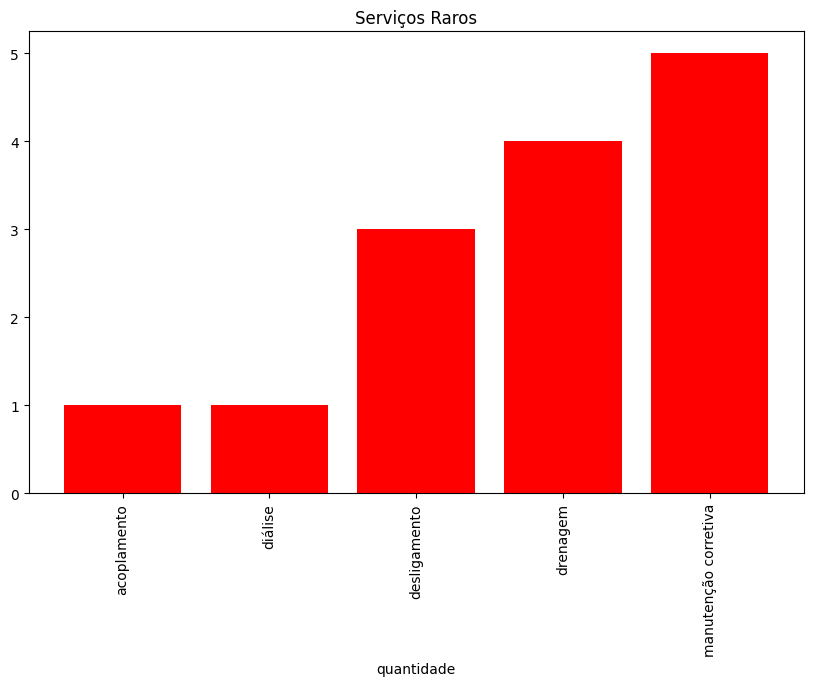

In [ ]:
contagem = {} #cria uma lista para contar quantas vezes cada categoria aparece
for texto in df_final['categoria_servico']: #para percorrer cada item da coluna categoria_servico
   categoria = texto.strip() #tira espaçõs extras do começo e fim
   if categoria != 'manutenção mensal': #retira a manutenção mensal da contagwm
      if categoria in contagem: #se já existe no dicionario, soma +1 se não existr ainda, cria com valor 1
         contagem[categoria] += 1
      else:
         contagem[categoria] = 1

tabela = pd.DataFrame({'categoria': list(contagem.keys()),
                       'total': list(contagem.values()) #vira um dataframe com duas colunas: categoria e total
})
raros = tabela[tabela['total']<= 5] #pega só os serviços que aparecem 5 vezes ou menos que isso
raros = raros.sort_values(by='total', ascending=True) #ordena do que aparece menos para mais

tabela['percentual'] = (tabela['total'] / tabela['total'].sum()) * 100 #calcula o percentual de cada categoria representando o total de serviços

tabela = tabela.sort_values(by="percentual", ascending=False) #ordena a tabela do maior percentual para o menor
tabela

plt.figure(figsize=(10, 6))
plt.bar(raros['categoria'], raros['total'], color='red')
plt.xticks(rotation=90)
plt.title('Serviços Raros')
plt.xlabel('categoria')
plt.xlabel('quantidade')
plt.show()




1.   Maior volume: troca de peça(36,7%)
2.   Menor volume: drenagem, desligamento, acoplamento e diálise (-1% dos casos)



In [ ]:
contagem = {}
for texto in df_final['categoria_servico']:
     categoria = texto.strip()
     if categoria != 'manutenção mensal':
      if categoria in contagem:
       contagem[categoria] += 1
      else:
       contagem[categoria] = 1
tabela = pd.DataFrame({'categoria': list(contagem.keys()),
                       'total': list(contagem.values())
})

tabela['percentual'] = (tabela['total'] / tabela['total'].sum()) * 100
tabela = tabela.sort_values(by='percentual', ascending=False)
tabela

,categoria,total,percentual
0,troca de peça,478,36.71
2,limpeza,305,23.43
1,revisão,239,18.36
4,instalação,71,5.45
6,atendimento emergencial,49,3.76
9,inoperante,44,3.38
8,retirada de peça,29,2.23
12,teste,16,1.23
10,regulagem,13,1.00
3,desmontagem,12,0.92


In [ ]:
df_final.isnull().sum() #verifica quantos valores faltando existem

,0
id,0
CLIENTE,5
TECNICO,178
DIA,181
MES,156
DATA,5422
TEMPO_EXECUCAO,201
HORAS_TRABALHADAS,504
SERVICO_EXTRA,7614
ANO,0


**Gráfico: Tempo gasto em cada tipo de serviço**


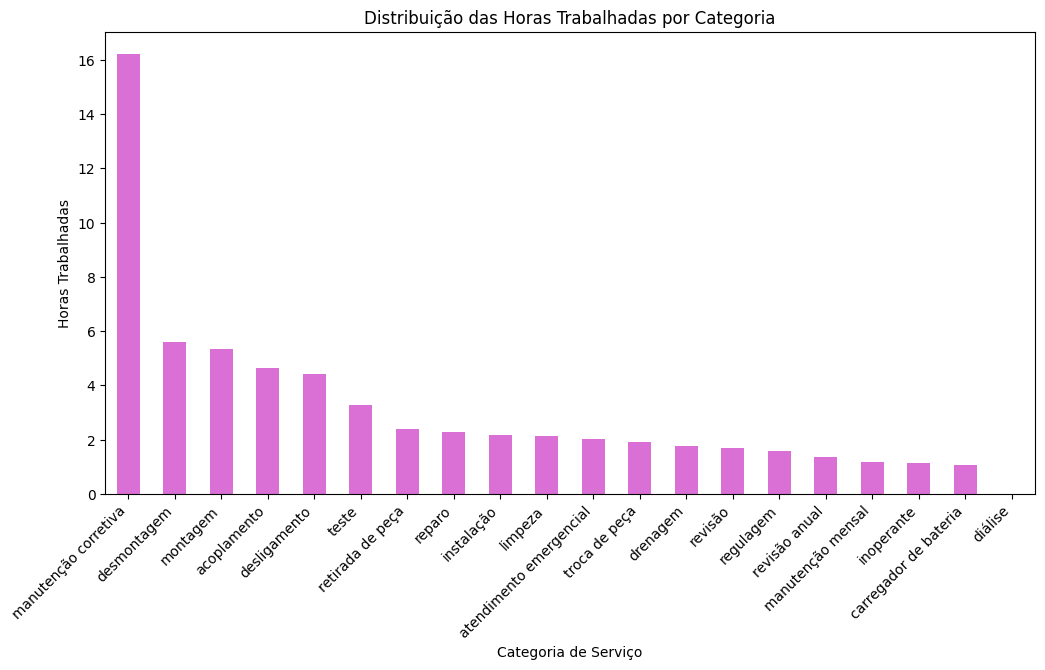

In [ ]:
horas_por_categoria = df_final.groupby('categoria_servico')['HORAS_TRABALHADAS'].mean().sort_values(ascending=False)


plt.figure(figsize=(12,6))
horas_por_categoria.plot(kind='bar',color='orchid')



plt.title('Distribuição das Horas Trabalhadas por Categoria')
plt.xlabel('Categoria de Serviço')
plt.ylabel('Horas Trabalhadas')
plt.xticks(rotation=45, ha='right')
plt.show()

* Ação altamente concentrada em manutenção preventiva e rotinas mensais, com pouca demandas por intervenções complexas

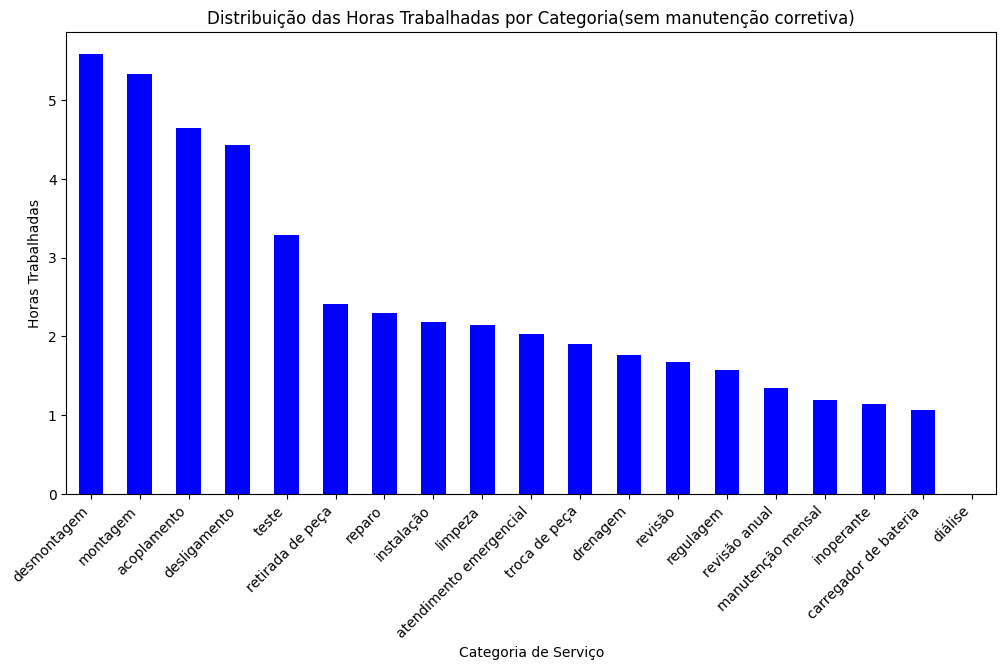

In [ ]:
df_filtr = df_final[df_final['categoria_servico'] != 'manutenção corretiva']

horas_por_categoria = df_filtr.groupby('categoria_servico')['HORAS_TRABALHADAS'].mean().sort_values(ascending=False)


plt.figure(figsize=(12,6))
horas_por_categoria.plot(kind='bar',color='blue')



plt.title('Distribuição das Horas Trabalhadas por Categoria(sem manutenção corretiva)')
plt.xlabel('Categoria de Serviço')
plt.ylabel('Horas Trabalhadas')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
horas_totais = df_final.groupby('categoria_servico')['HORAS_TRABALHADAS'].sum().sort_values(ascending=False).reset_index()
horas_totais.columns = ['Categoria de Serviço', 'Horas Totais']
print(horas_totais)



       Categoria de Serviço  Horas Totais
0         manutenção mensal       8814.92
1             troca de peça        842.88
2                   limpeza        582.18
3                   revisão        362.28
4                instalação        148.72
5   atendimento emergencial         93.42
6      manutenção corretiva         81.08
7          retirada de peça         67.42
8               desmontagem         61.42
9                inoperante         50.02
10                    teste         46.08
11                 montagem         21.32
12                   reparo         18.35
13                regulagem         15.78
14             desligamento         13.27
15            revisão anual         10.78
16    carregador de bateria         10.65
17                 drenagem          7.03
18              acoplamento          4.65
19                  diálise          0.00


In [ ]:
df.columns


Index(['CLIENTE', 'TECNICO', 'DIA', 'MES', 'TEMPO_EXECUCAO',
       'HORAS_TRABALHADAS', 'SERVICO_EXTRA', 'DATA'],
      dtype='object')

Top 10 clientes com maior valor de Contrato(considerando o valor da hora do técnico 33 reais)

---
Clientes com maior impacto financeiro: Real Auto Ônibus, Condomínio Riserva Golf e Condomínio Passeio. (concentram maior volume de horas)


In [ ]:
valor_hora = 33
horas_por_cliente = df_final.groupby('CLIENTE')['HORAS_TRABALHADAS'].sum().reset_index()
horas_por_cliente['VALOR_CONTRATO'] = horas_por_cliente['HORAS_TRABALHADAS'] * valor_hora
top10 = horas_por_cliente.sort_values('VALOR_CONTRATO', ascending=False).head(10)
top10

,CLIENTE,HORAS_TRABALHADAS,VALOR_CONTRATO
541,REAL AUTO ONIBUS,144.13,4756.40
196,COND RISERVA GOLF,138.07,4556.20
223,COND. PASSEIO,133.30,4398.90
101,COCA COLA ITABIRITO,125.35,4136.55
206,COND VISCONDE DE OURO PRETO,114.15,3766.95
124,COCA COLA MARILIA,106.73,3522.20
636,XP CORPORATE,104.60,3451.80
384,HF BARRA BLUE,96.00,3168.00
199,COND SANTA MONICA,93.33,3080.00
504,NATURAL ARAPANES,92.52,3053.05


Os maiores contratos são Real Auto Ônibus, Riserva Golf, Cond. Passeio e Coca-Cola Itabirito, todos acima de 125 horas. Esses clientes formam o grupo que mais demanda serviço e gera o maior faturamento, composto principalmente por condomínios grandes e empresas corporativas.

A diferença entre o 1º e o 10º lugar é pequena, mostrando que não existe dependência de um único cliente — a receita é bem distribuída.






In [ ]:
valor_hora = 33

contratos_ano = (
    df_final.groupby(['ANO', 'CLIENTE'])['HORAS_TRABALHADAS']
    .sum()
    .reset_index()
)
contratos_ano['VALOR_CONTRATO'] = contratos_ano['HORAS_TRABALHADAS'] * valor_hora

top10_por_ano = (
contratos_ano.sort_values(['ANO','VALOR_CONTRATO'], ascending=[True,False])
.groupby('ANO')
.head(10)
)

top10_por_ano


,ANO,CLIENTE,HORAS_TRABALHADAS,VALOR_CONTRATO
315,2023,NUTRIENTES,60.45,1994.85
67,2023,COCA COLA ITABIRITO,33.43,1103.30
131,2023,CONDOMINIO INTERNACIONAL RIO,32.58,1075.25
250,2023,HORTI FRUTI JUIZ DE FORA,29.83,984.50
105,2023,CONDOMINIO CEAL,28.67,946.00
129,2023,CONDOMINIO GLORIA 122,28.40,937.20
318,2023,PENINSULA SMART,28.10,927.30
166,2023,CONDOMINIO SEND,26.90,887.70
143,2023,CONDOMINIO OUVIDOR 107,26.27,866.80
94,2023,COCA COLA TRÊS CORAÇÕES,25.45,839.85


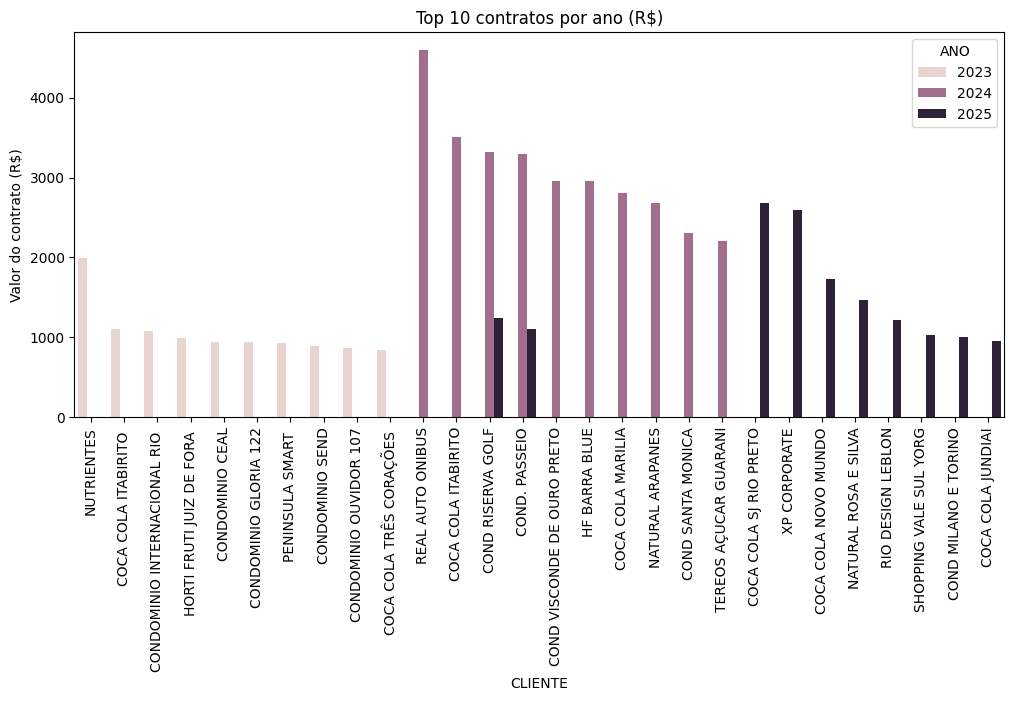

In [ ]:
plt.figure(figsize=(12,5))

sns.barplot(
    data=top10_por_ano,
    x="CLIENTE",
    y="VALOR_CONTRATO",
    hue="ANO"
)
plt.title("Top 10 contratos por ano (R$)")
plt.xticks(rotation=90)
plt.ylabel("Valor do contrato (R$)")
plt.show()

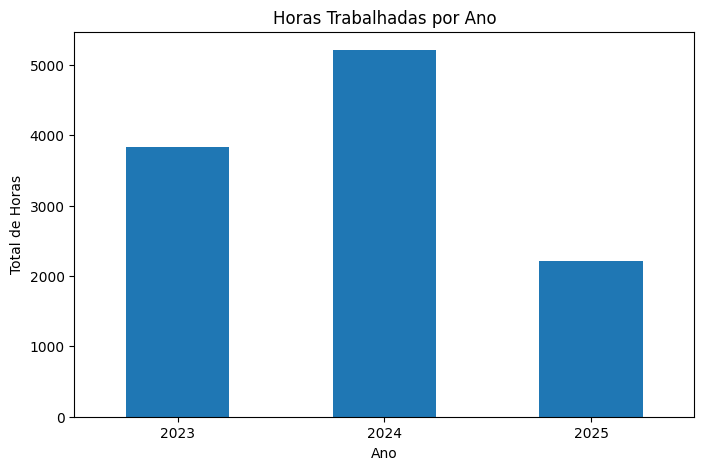

In [ ]:

horas_por_ano = df_final.groupby("ANO")["HORAS_TRABALHADAS"].sum()

plt.figure(figsize=(8,5))
horas_por_ano.plot(kind='bar')

plt.title("Horas Trabalhadas por Ano")
plt.xlabel("Ano")
plt.ylabel("Total de Horas")
plt.xticks(rotation=0)
plt.show()


**Observa-se um crescimento significativo entre 2023 e 2024, seguido de queda em 2025, possivelmente relacionada à redução de serviços, sazonalidade ou mudanças na operação.**

In [ ]:
df_final['ANO'].value_counts()

,count
ANO,
2024,3615
2023,3042
2025,2442


**2024 foi o ano com maior carga de trabalho, 2023 o ano com mais clientes atendidos e 2025 mostra uma redução, possivelmente por dados ainda incompletos ou otimização dos processos. Os meses de pico indicam sazonalidade na demanda, reforçando a importância da organização e análise contínua dos dados.**

In [ ]:
anos = df_final['ANO'].dropna().unique()
print('Resumo geral\n')

for ano in anos:
    df_ano = df_final[df_final['ANO'] == ano]
    horas = df_ano['HORAS_TRABALHADAS'].sum()
    clientes = df_ano['CLIENTE'].nunique()
    tecnicos = df_ano['TECNICO'].nunique()

    mes_mais = df_ano['MES'].value_counts().idxmax()
    qtd_mes = df_ano['MES'].value_counts().max()

    print(f'Ano: {ano}')
    print(f'Horas :{horas:.2f}')
    print(f'Clientes: {clientes}')
    print(f'Técnicos:{tecnicos}')
    print(f'- Mês com mais serviços: {mes_mais} ({qtd_mes} serviços)\n')

Resumo geral

Ano: 2024
Horas :5210.40
Clientes: 258
Técnicos:10
- Mês com mais serviços: 1.0 (328 serviços)

Ano: 2025
Horas :2209.22
Clientes: 249
Técnicos:7
- Mês com mais serviços: 1.0 (307 serviços)

Ano: 2023
Horas :3832.63
Clientes: 377
Técnicos:11
- Mês com mais serviços: 3.0 (270 serviços)



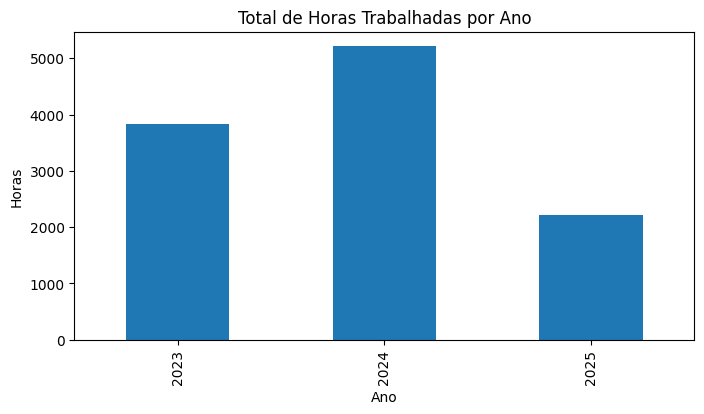

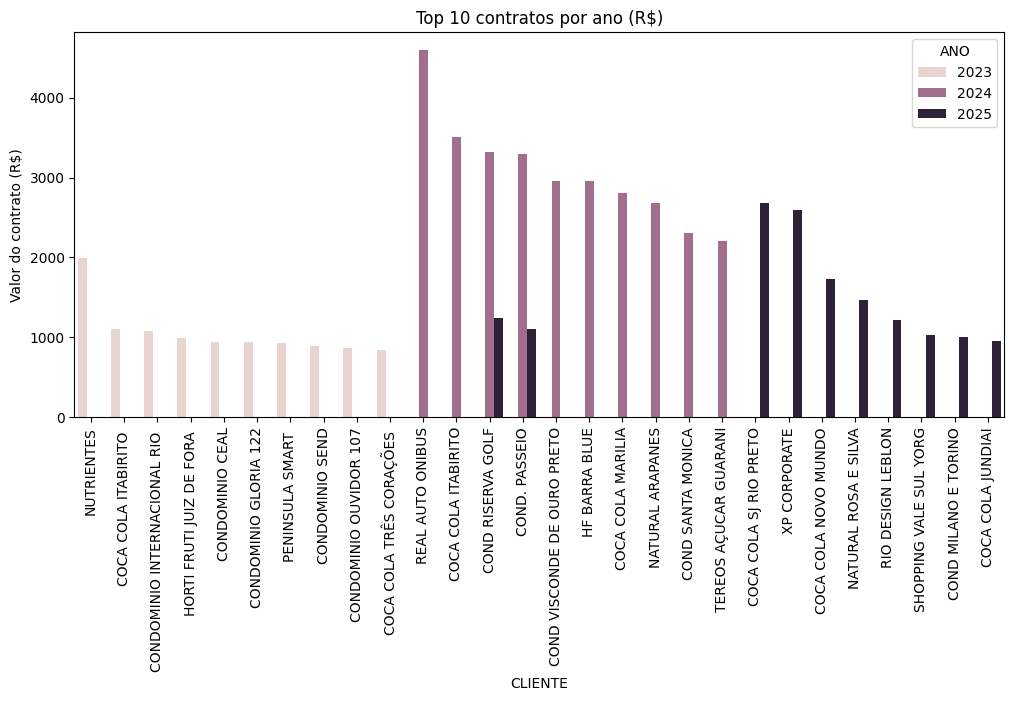

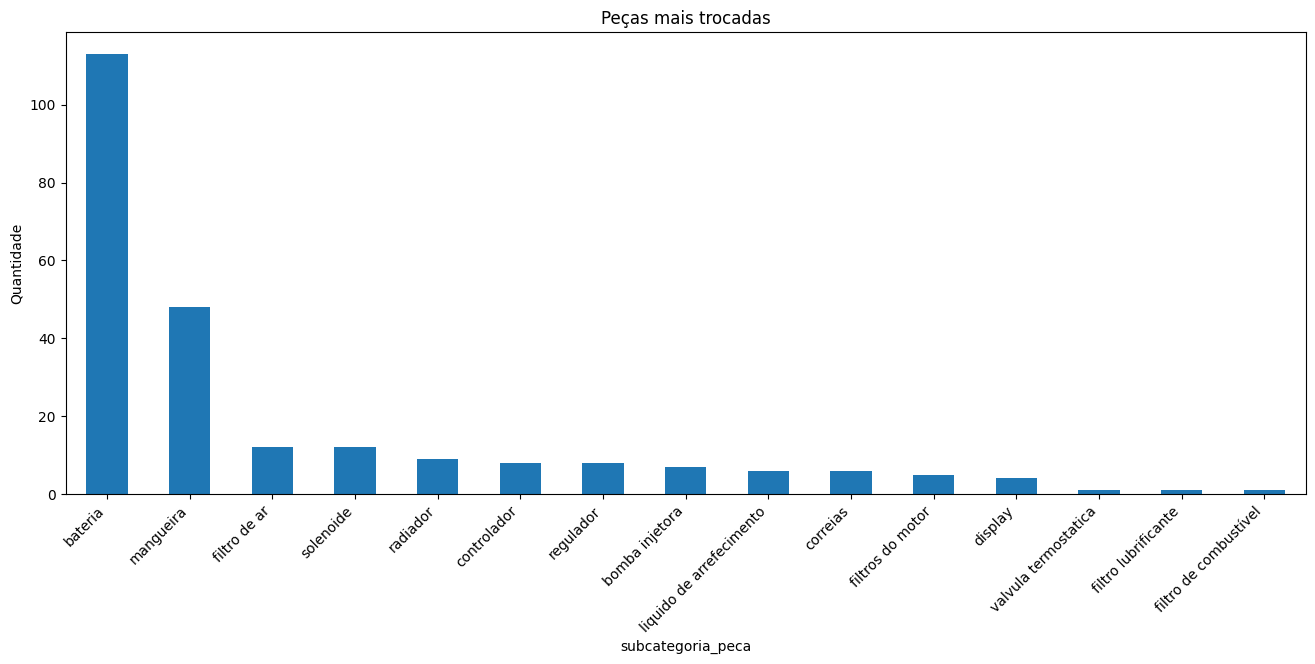

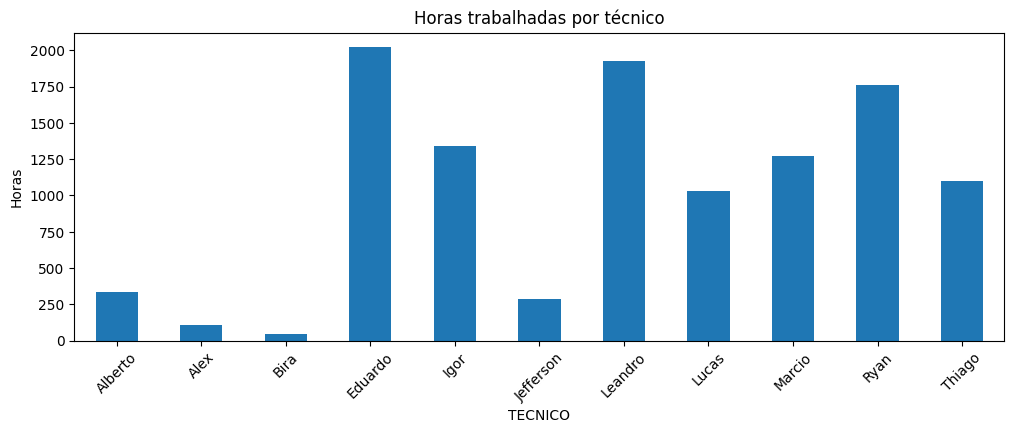

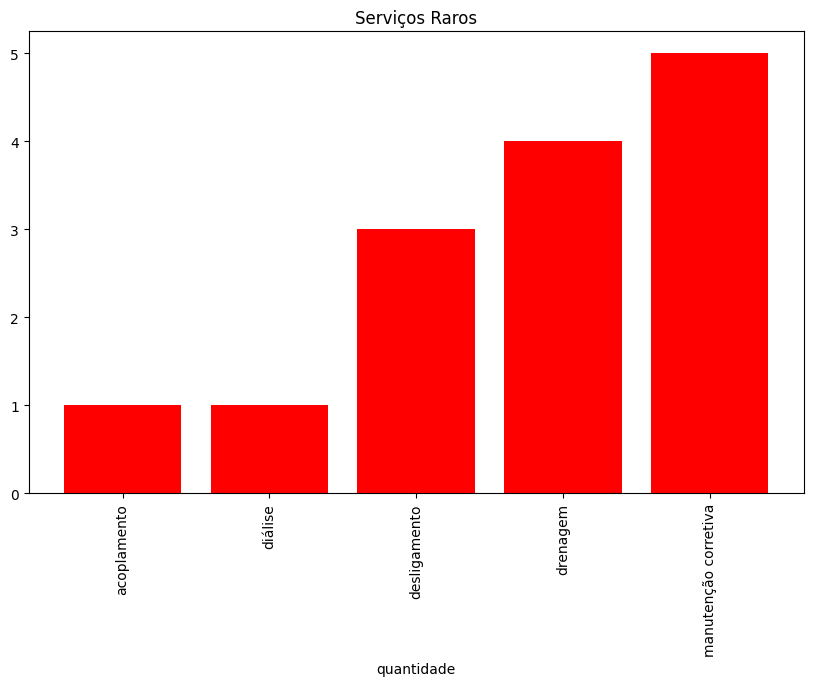

In [ ]:

plt.figure(figsize=(8,4))
df_final.groupby("ANO")["HORAS_TRABALHADAS"].sum().plot(kind="bar")
plt.title("Total de Horas Trabalhadas por Ano")
plt.ylabel("Horas")
plt.xlabel("Ano")
plt.show()

valor_hora = 33

contratos_ano = (
    df_final.groupby(['ANO', 'CLIENTE'])['HORAS_TRABALHADAS']
    .sum()
    .reset_index()
)

contratos_ano['VALOR_CONTRATO'] = contratos_ano['HORAS_TRABALHADAS'] * valor_hora

top10_por_ano = (
    contratos_ano
    .sort_values(['ANO','VALOR_CONTRATO'], ascending=[True,False])
    .groupby('ANO')
    .head(10)
)

plt.figure(figsize=(12,5))
sns.barplot(
    data=top10_por_ano,
    x="CLIENTE",
    y="VALOR_CONTRATO",
    hue="ANO"
)
plt.title("Top 10 contratos por ano (R$)")
plt.xticks(rotation=90)
plt.ylabel("Valor do contrato (R$)")
plt.show()

pecas_contagem = (
    df_final[df_final["categoria_servico"] == "troca de peça"]["subcategoria_peca"]
    .value_counts()
)

if "Outros" in pecas_contagem.index:
    pecas_contagem = pecas_contagem.drop("Outros")

plt.figure(figsize=(16,6))
pecas_contagem.plot(kind="bar")
plt.title("Peças mais trocadas")
plt.ylabel("Quantidade")
plt.xticks(rotation=45,ha='right')
plt.show()


tec_horas = df_final.groupby("TECNICO")["HORAS_TRABALHADAS"].sum()

plt.figure(figsize=(12,4))
tec_horas.plot(kind="bar")
plt.title("Horas trabalhadas por técnico")
plt.ylabel("Horas")
plt.xticks(rotation=45)

plt.figure(figsize=(10, 6))
plt.bar(raros['categoria'], raros['total'], color='red')
plt.xticks(rotation=90)
plt.title('Serviços Raros')
plt.xlabel('categoria')
plt.xlabel('quantidade')


plt.show()


A distribuição das horas trabalhadas ao longo do ano mostra maior concentração no início (jan) e no fim (nov/dez), indicando picos operacionais nesses períodos. Já os meses intermediários apresentam volume mais equilibrado, sugerindo demanda estável e sem variações bruscas ao longo do ano.

In [ ]:
total_count = resultado_mes['HORAS_TRABALHADAS'].sum()

resultado_mes['porcentagem'] = round ((resultado_mes['HORAS_TRABALHADAS'] / total_count)* 100,1)

print(f'{round(resultado_mes, 2)}%')

    MES  HORAS_TRABALHADAS  porcentagem
0     1             639.60        12.30
10   11             521.30        10.00
5     6             461.67         8.90
8     9             454.30         8.70
9    10             437.17         8.40
11   12             436.50         8.40
6     7             410.78         7.90
3     4             378.02         7.30
4     5             377.48         7.20
7     8             373.40         7.20
2     3             364.68         7.00
1     2             355.50         6.80%


In [ ]:

df_final.to_excel('dados_categorizados.xlsx', index=False, float_format="%.2f") #salva o dataframe df em um novo arquivo
from google.colab import files #index false - nao salva o indice(num das linhas) no excel
files.download('dados_categorizados.xlsx') #abre a janela pra baixar o arquivo
#FIM DESSA BOMBA, FICAR ATENTA AS INDENTAÇÕES E LOGICA
#MODULARIZA ISSO DEPOIS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>